#Mercadeo bancario con DL

##P1.Importando librerias.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense

from sklearn import preprocessing
le =preprocessing.LabelEncoder()

##P2. cargue del dataset

In [ ]:
df_ti = pd.read_csv('https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/mercadeo_bancario.csv', encoding='utf-8')
df_ti.head()

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1


In [ ]:
df_ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      41188 non-null  int64 
 1   trabajo                   41188 non-null  object
 2   estado_civil              41188 non-null  object
 3   educacion                 41188 non-null  object
 4   total_hijos               41188 non-null  int64 
 5   credito_sin_pago          41188 non-null  object
 6   prestamo_vivienda         41188 non-null  object
 7   prestamo_personal         41188 non-null  object
 8   valor_prestamo            41188 non-null  int64 
 9   dias_ultimo_pago          41188 non-null  int64 
 10  tarjetas_credito          41188 non-null  int64 
 11  contacto                  41188 non-null  object
 12  mes                       41188 non-null  object
 13  dia_semana                41188 non-null  object
 14  duracion_ultimo_contac

###P2.1 conociendo la data y corrigiendoda.

In [ ]:
# Convertiendo todos los tipos de datos a numericos
df_ti['trabajo']=le.fit_transform(df_ti['trabajo'])
df_ti['estado_civil ']=le.fit_transform(df_ti['estado_civil '])
df_ti['educacion']=le.fit_transform(df_ti['educacion'])
df_ti['credito_sin_pago']=le.fit_transform(df_ti['credito_sin_pago'])
df_ti['prestamo_vivienda']=le.fit_transform(df_ti['prestamo_vivienda'])
df_ti['prestamo_personal']=le.fit_transform(df_ti['prestamo_personal'])
df_ti['contacto']=le.fit_transform(df_ti['contacto'])
df_ti['mes']=le.fit_transform(df_ti['mes'])
df_ti['dia_semana']=le.fit_transform(df_ti['dia_semana'])
df_ti['si_no']=le.fit_transform(df_ti['si_no'])
df_ti.head()

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,1,1,2,7,1,2,0,268017,0,5,0,1,2,210,43,0,88,0
1,53,9,1,7,1,0,0,0,0,0,0,0,7,0,138,0,0,14,0
2,28,4,2,6,3,0,2,0,308036,0,0,0,4,2,339,27,2,1993,1
3,39,7,1,0,1,0,0,0,0,0,4,0,0,0,185,0,0,1338,0
4,55,5,1,2,2,0,2,0,249888,0,4,0,1,0,137,2,1,1184,1


In [ ]:
df_ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   edad                      41188 non-null  int64
 1   trabajo                   41188 non-null  int64
 2   estado_civil              41188 non-null  int64
 3   educacion                 41188 non-null  int64
 4   total_hijos               41188 non-null  int64
 5   credito_sin_pago          41188 non-null  int64
 6   prestamo_vivienda         41188 non-null  int64
 7   prestamo_personal         41188 non-null  int64
 8   valor_prestamo            41188 non-null  int64
 9   dias_ultimo_pago          41188 non-null  int64
 10  tarjetas_credito          41188 non-null  int64
 11  contacto                  41188 non-null  int64
 12  mes                       41188 non-null  int64
 13  dia_semana                41188 non-null  int64
 14  duracion_ultimo_contacto  41188 non-nu

##P3. Dividir los datos de entrada y salida (categoria).

In [ ]:
X = df_ti[['edad','trabajo','estado_civil ','educacion','total_hijos','credito_sin_pago','prestamo_vivienda','prestamo_personal','valor_prestamo','dias_ultimo_pago','tarjetas_credito','contacto','mes','dia_semana','duracion_ultimo_contacto','dias_ultimo_contacto','anterior_contacto','numero_empleados']]
y = df_ti['si_no']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   edad                      41188 non-null  int64
 1   trabajo                   41188 non-null  int64
 2   estado_civil              41188 non-null  int64
 3   educacion                 41188 non-null  int64
 4   total_hijos               41188 non-null  int64
 5   credito_sin_pago          41188 non-null  int64
 6   prestamo_vivienda         41188 non-null  int64
 7   prestamo_personal         41188 non-null  int64
 8   valor_prestamo            41188 non-null  int64
 9   dias_ultimo_pago          41188 non-null  int64
 10  tarjetas_credito          41188 non-null  int64
 11  contacto                  41188 non-null  int64
 12  mes                       41188 non-null  int64
 13  dia_semana                41188 non-null  int64
 14  duracion_ultimo_contacto  41188 non-nu

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.40,random_state=100)

##P4. creando el modelo

In [ ]:
# crea el modelo
model3 = Sequential()
model3.add(Dense(6, input_dim=18, activation='relu'))   #dos capas en una(1° con 8 neuronas (caracteristicas de entrada), 2° con 12 neuronas  )
model3.add(Dense(12, activation='relu'))
model3.add(Dense(24, activation='relu'))
# model3.add(Dense(48, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))  #al ser una clasificación binaria usaremos sigmoidal
model3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 6)                 114       
                                                                 
 dense_54 (Dense)            (None, 12)                84        
                                                                 
 dense_55 (Dense)            (None, 24)                312       
                                                                 
 dense_56 (Dense)            (None, 1)                 25        
                                                                 
Total params: 535
Trainable params: 535
Non-trainable params: 0
_________________________________________________________________


##P5. compilando modelo

In [ ]:
model3.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc'])

##P6. Entrenando modelo

In [ ]:
historial= model3.fit(X_train, Y_train, epochs=1000, batch_size=10)

Epoch 1/1000
2472/2472 [==============================] - 5s 2ms/step - loss: 50.1508 - acc: 0.8212
Epoch 2/1000
2472/2472 [==============================] - 5s 2ms/step - loss: 23.5114 - acc: 0.8406
Epoch 3/1000
2472/2472 [==============================] - 5s 2ms/step - loss: 10.0895 - acc: 0.8456
Epoch 4/1000
2472/2472 [==============================] - 5s 2ms/step - loss: 1.8040 - acc: 0.8597
Epoch 5/1000
2472/2472 [==============================] - 5s 2ms/step - loss: 0.3793 - acc: 0.8856
Epoch 6/1000
2472/2472 [==============================] - 5s 2ms/step - loss: 0.3262 - acc: 0.8896
Epoch 7/1000
2472/2472 [==============================] - 5s 2ms/step - loss: 0.3242 - acc: 0.8899
Epoch 8/1000
2472/2472 [==============================] - 5s 2ms/step - loss: 0.3243 - acc: 0.8901
Epoch 9/1000
2472/2472 [==============================] - 5s 2ms/step - loss: 0.3296 - acc: 0.8895
Epoch 10/1000
2472/2472 [==============================] - 5s 2ms/step - loss: 0.3282 - acc: 0.8895
Epoch 

##P7.Graficamos el entrenamiento

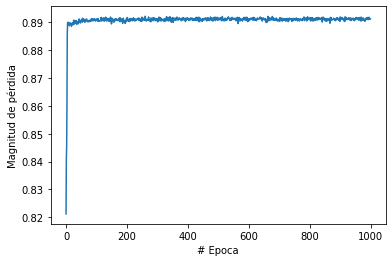

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["acc"])

##P8. Evaluar la Red Neuronal

In [ ]:
# evalua el modelo
scores3 = model3.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model3.metrics_names[1], scores3[1]*100))

515/515 [==============================] - 1s 2ms/step - loss: 0.3571 - acc: 0.8919

acc: 89.19%


##P9.exportar modelo

In [ ]:
model3.save('DL_MERCADEO-BANCARIO.h5')